$$ \text{THEORETICAL ANALYSIS OF THE ROLE OF DRAG} $$

In [1]:
from sympy import *

init_printing(pretty_print=False,wrap_line=False)

m = Symbol('m')  #defining our symbols
g = Symbol('g')
b = Symbol('b')
u = Symbol('u')
v_z = Symbol('v_z')

integrate((m/(b*u**2 - m*g)),(u,0,v_z))   #intergrating using sympy intergrate method

-m*(sqrt(1/(b*g*m))*log(-g*m*sqrt(1/(b*g*m)))/2 - sqrt(1/(b*g*m))*log(g*m*sqrt(1/(b*g*m)))/2) + m*(sqrt(1/(b*g*m))*log(-g*m*sqrt(1/(b*g*m)) + v_z)/2 - sqrt(1/(b*g*m))*log(g*m*sqrt(1/(b*g*m)) + v_z)/2)

In [2]:
u_t = Symbol('u_t') 

eq = integrate(u_t**2/(u**2 - u_t**2) , (u,0,v_z)) 

print(eq)

-u_t*(log(-u_t)/2 - log(u_t)/2) + u_t*(log(-u_t + v_z)/2 - log(u_t + v_z)/2)


$\text{The intergral we got doesn't exactly match equation [11] the first two terms however should not be there since:} $


$$ \log{(-u_t)} - \log{(u_t)} = \log{(-1)} $$

$\text{which is undefined}$

$\text{this happens because sympy does not use absolute values for intergrals}$

the sympy solve (eq, v_x) works by setting eq = 0 and then solving for v_x (second element)

In [3]:
#this is a simple step to remove unwanted terms
eq = eq - (-u_t*(log(-u_t)/2 - log(u_t)/2))

g = Symbol('g')
t = Symbol('t')

eq = eq - g*t #since eq is set to 0 g*t is taken from both sides

v = solve(eq,v_z)
print(v)


[-u_t/tanh(log(exp(2*g*t))/(2*u_t))]


$\text{We get an equation very similar to equation 13, our logarithm in this case is a natural logarithm therefore:}$
$$ v_z = -u_t\tanh{\frac{\ln{e^{2gt}}}{2u_t}}
= -u_t\tanh{\frac{2gt}{2u_t}}
= -u_t\tanh{(\frac{g}{u_t}t)} $$

$$ v = \frac{dz}{dt}

z = \int_{0}^{z_0} {v} dt $$

In [4]:
v_a = -u_t*tanh((g/u_t)*t)

T = Symbol('T')
integrate(v_a,(t,0,T))

Piecewise((-u_t*(T - u_t*log(tanh(T*g/u_t) + 1)/g), (g > -oo) & (g < oo) & Ne(g, 0)), (0, True))

$\text{The equation python gives out is:}$

$$  \int_{z_0}^z dz= -u_tt + \frac{u_t^2}{g}(\ln{(\tanh{(\frac{tg}{u_t})+1})}) $$

$\text{Using equations (12) it can be shown that:}$

$$ \tanh{x} + 1 = \frac{1}{\cosh{x}} {e^x}  $$

$\text{which will give:}$ 
$$ z - z_0 = -u_tt + \frac{u_t^2}{g}{\ln{({\frac{1}{\cosh{(\frac{tg}{u_t})}}}}{e^{\frac{tg}{u_t}})}} $$

$\text{then using logarithm rules the final answer equation (14) is equired}$

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
u_t = 60


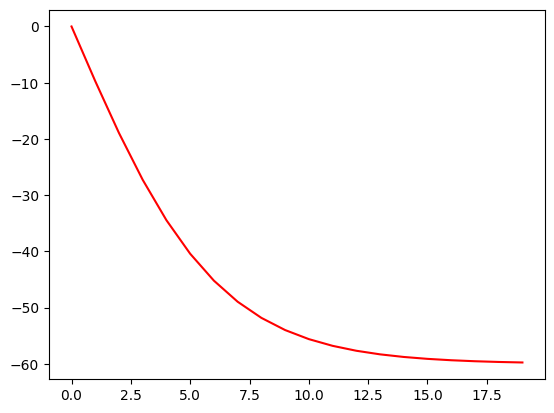

u_t = 40


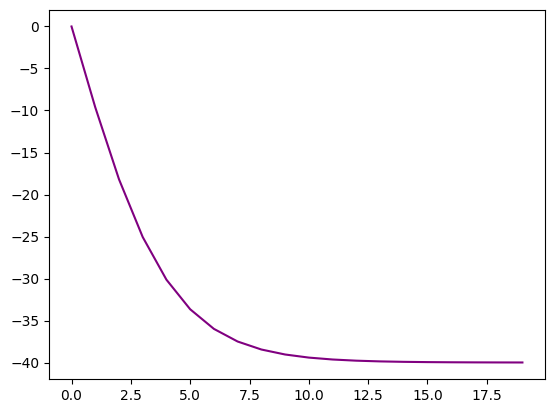

u_t = 20


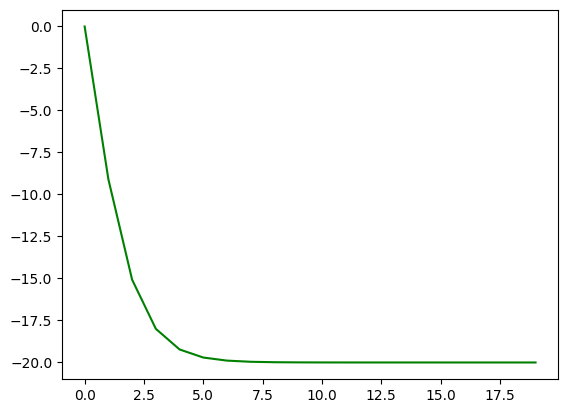

In [5]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


time = np.arange(0,20) #time going up to 20 seconds
print(time)

def velocity(time,u_t,g):   #function of time named velocity
    velocity = []

    for i in time:
        v = -u_t*tanh((g/u_t)*i)  
        velocity.append(v)

    return np.array(velocity)   


first = velocity(time,60,9.81)   #3 different values of u_t are inputted into our function and plotted

print("u_t = 60")
plt.plot(time,first,color="red")
plt.show()

print("u_t = 40")
second = velocity(time,40,9.81)
plt.plot(time,second,color="purple")
plt.show()

print("u_t = 20")
third = velocity(time,20,9.81)
plt.plot(time,third,color="green")
plt.show()


$$\text{from the graphs above it can be seen that $u_t$ corresponds to the terminal velocity of the cannonball}$$ 

$$ \text{Calculating the Effect of Drag on a Dropped Cannonball} $$

In [6]:
#resetting required symbols
from sympy import *

z_0 = Symbol('z_0')
u_t = Symbol('u_t')
g = Symbol('g')
t = Symbol('t')

z = z_0 - (u_t**2/g)*log(cosh(g/u_t * t))

eq = solve(z,t)
print(eq)



[u_t*log(-sqrt(exp(2*g*z_0/u_t**2) - 1) + exp(g*z_0/u_t**2))/g, u_t*log(sqrt(exp(2*g*z_0/u_t**2) - 1) + exp(g*z_0/u_t**2))/g]


In [7]:
def drag(u_t,g,z_0):
    t = u_t*log(-sqrt(exp(2*g*z_0/u_t**2) - 1) + exp(g*z_0/u_t**2))/g, u_t*log(sqrt(exp(2*g*z_0/u_t**2) - 1) + exp(g*z_0/u_t**2))/g
    for i in t:
        if i > 0:
            return i  #this way any negative times are removed

time_drag = drag(100,10,500)

def no_drag(z,a):
    t = sqrt(2*z/a)
    return t

time_no_drag = no_drag(500,10)

print("With drag the cannon ball will take:",time_drag - time_no_drag,"seconds longer")

With drag the cannon ball will take: 0.850385019483877 seconds longer


$$ \text{NUMERICAL ANALYSIS OF THE ROLE OF DRAG} $$

$$ \text{A. Numerical Study of the Role of Drag on a Dropped Cannonball} $$

In [8]:
N = 1000
T_max = time_drag
deltT = T_max/N

T = np.arange(0,T_max + deltT,deltT)

Z = np.zeros(N+1)
Z[0] = 500
V = np.zeros(N+1)


assert len(T) == N + 1

In [9]:
from math import *
g = 10
u_t = 100

for i in range(1,N+1):
    V[i] = V[i-1] + deltT*(-g-(g/u_t**2)*(sqrt((V[i-1])**2)*V[i-1]))
    Z[i] = Z[i-1] + deltT*(V[i-1])


Distance-Time Graph


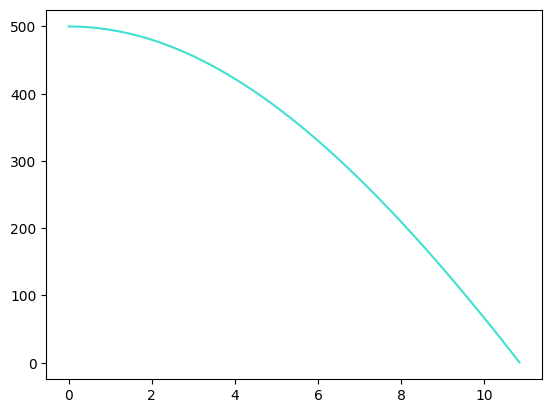

Velocity-Time Graph


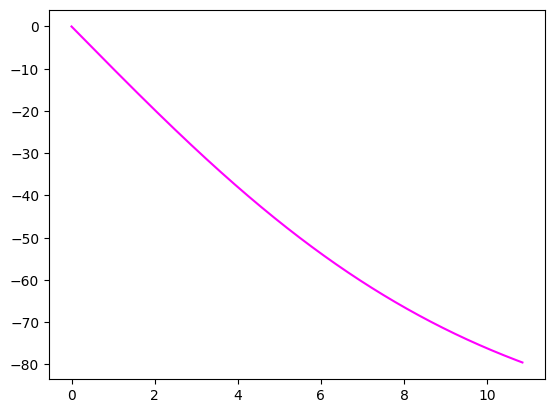

In [10]:
print("Distance-Time Graph")
plt.plot(T,Z,color="turquoise")
plt.show()

print("Velocity-Time Graph")
plt.plot(T,V,color="magenta")
plt.show()

In order to solve global error for a linear function of $\Delta{t}$ we need to use the code just used and create a funtion and return a $\Delta{t}$, global error tuple. This will look exactly like the code above, inside a function.

In [11]:
def global_error(N,T_max,g,u_t):
    deltT = T_max/N
    
    T = np.arange(0,T_max + deltT,deltT)
    Z = np.zeros(N+1)
    Z[0] = 500
    V = np.zeros(N+1)

    for i in range(1,N+1):
        V[i] = V[i-1] + deltT*(-g-(g/u_t**2)*(sqrt((V[i-1])**2)*V[i-1]))
        Z[i] = Z[i-1] + deltT*(V[i-1])
        
    global_error = Z[N]

    return global_error
    

Once the function has been created we can loop through this function with a range of values for N and successfully show the desired linear relationship

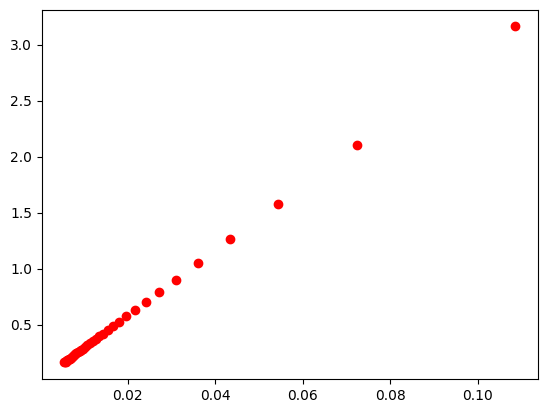

In [12]:
error = []
deltTime = []


for i in range(100,2000,50):
    a = global_error(i,time_drag,10,100)
    error.append(a)
    b = time_drag/i
    deltTime.append(b)

plt.scatter(deltTime,error,color="red")
plt.show()


$$\text{B. Numerical Study of the Role of Drag on a Launched Cannonball} $$

$\text{We have an equation for:}$
$$ m\frac{dv_x}{dt} $$

$\text{by dividing both sides by m we can end up with an expression for acceleration and discretise for V}$
$$ V_x(t + \Delta{t}) = V_x(t) + \Delta{t}{\frac{dv_x}{dt}}$$

$\text{and this is the same for}{V_z} :$ 
$$ V_z(t + \Delta{t}) = V_z(t) + \Delta{t}{\frac{dv_z}{dt}}$$





In [14]:
from math import *

def motion(N,u_x,u_z,T_max,g,u_t):
    
    deltT = T_max/N
    
    T = np.arange(0,T_max + deltT,deltT)

    V_z = np.zeros(N+1)
    V_z[0] = u_z
    V_x = np.zeros(N+1)
    V_x[0] = u_x

    X = np.zeros(N+1)
    Z = np.zeros(N+1)

    final = 0

    for i in range(1,N+1):
        V_x[i] = V_x[i-1] + deltT*(-(g/u_t**2)*(sqrt(((V_x[i-1])**2)+(V_z[i-1])**2))*(V_x[i-1]))
        V_z[i] = V_z[i-1] + deltT*(-(g/u_t**2)*(sqrt(((V_x[i-1])**2)+(V_z[i-1])**2))*(V_z[i-1]) - g)
        X[i] = X[i-1] + deltT*(V_x[i])
        Z[i] = Z[i-1] + deltT*(V_z[i])

    Z_final = []



    for i in Z:
        if i >= 0:
            Z_final.append(i)
            

    Time = len(Z_final)*deltT

    return X,Z_final,Time

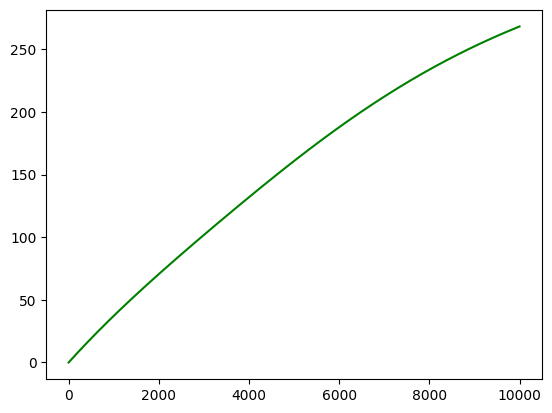

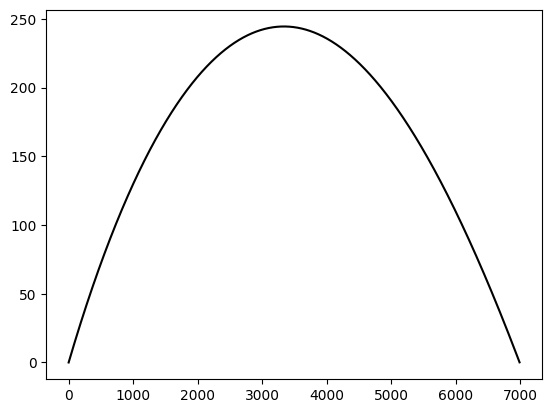

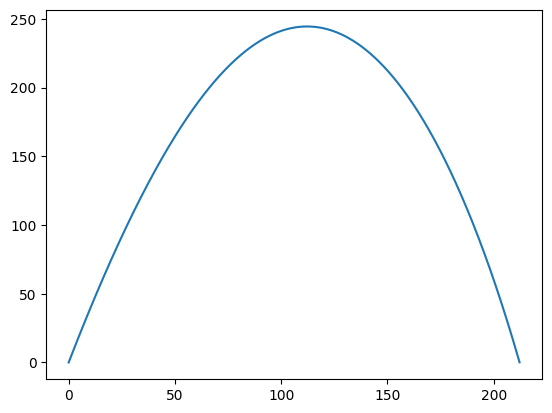

time of motion: 13.986
displacement: 212.1731847597137


In [16]:
X,Z,time = motion(10000,20,80,20,10,100)

plt.plot(X,color="green")
plt.show()
plt.plot(Z,color="black")
plt.show()
plt.plot(X[:len(Z)],Z)
plt.show()

distance = X[len(Z)]

print("time of motion:",time)
print("displacement:",distance)

$\text{Then this function is looped in increments of 20 from 20-100 to make a comparison for different velocities:}$

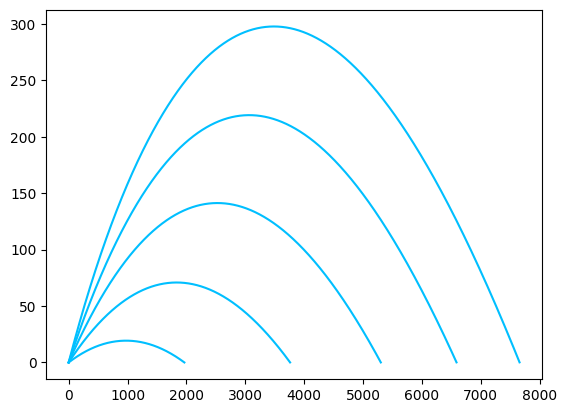

In [17]:

for i in range(0,101,20):
    X,Z,time = motion(10000,i,i,20,10,100)
    plt.plot(Z,color="deepskyblue")

$$\text{C. Predict the Landing Point of a Cannonball}$$

angle first past 250: 13.178029288008934 degrees distance: 256.83801139120004 m
angle second past 250: 80.78704911344607 degrees distance: 262.8512219783738 m


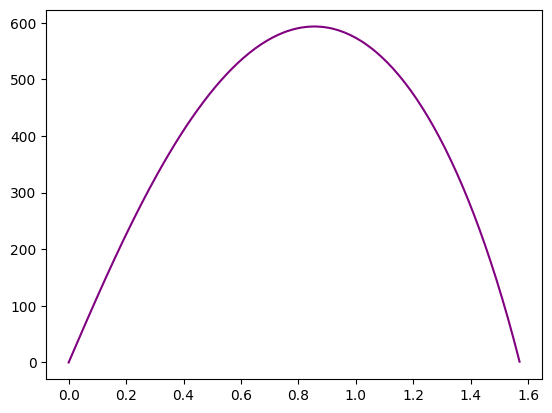

In [18]:
v_m = 100
x_hit = 250

angles = []
x_land = []

for i in np.arange(0,np.pi/2,0.01):
        u_x = v_m*sin(i)
        u_z = v_m*cos(i)
        X,Z,time = motion(10000,u_x,u_z,20,10,100)
        distance = X[len(Z)]
        angles.append(i)
        x_land.append(distance)

plt.plot(angles,x_land,color="purple")


for angle,x in zip(angles,x_land):
        if x > 250:
                print("angle first past 250:",angle * 180/np.pi,"degrees","distance:",x,"m")
                break

for angle,x in zip(angles[::-1],x_land[::-1]):
        if x > 250:
                print("angle second past 250:",angle * 180/np.pi,"degrees","distance:",x,"m")
                break
        
        

$$\text{Direct the Landing Point of a Cannonball With Wind} $$

In [19]:
import math as m

def windmotion(N,T_max,v_m,angle,w_x,g,u_t):
    deltT = T_max/N
    
    T = np.arange(0,T_max + deltT,deltT)


    V_z = np.zeros(N+1)
    V_z[0] = v_m*m.cos(angle)
    V_x = np.zeros(N+1)
    V_x[0] = v_m*m.sin(angle)

    X = np.zeros(N+1)
    Z = np.zeros(N+1)

    

    for i in range(1,N+1):
        V_x[i] = V_x[i-1] + deltT*(-(g/u_t**2)*(sqrt(((V_x[i-1] - w_x)**2)+(V_z[i-1])**2))*(V_x[i-1] - w_x))
        V_z[i] = V_z[i-1] + deltT*(-(g/u_t**2)*(sqrt(((V_x[i-1] - w_x)**2)+(V_z[i-1])**2))*(V_z[i-1]) - g)
        X[i] = X[i-1] + deltT*(V_x[i])
        Z[i] = Z[i-1] + deltT*(V_z[i])


    Z_final = []
    for i in Z:
        if i >= 0:
            Z_final.append(i)

    return X[:len(Z_final)],Z_final
    


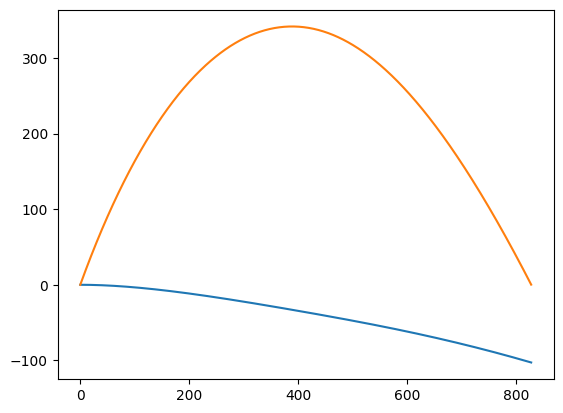

In [20]:
X,Z = windmotion(N,20,100,0,-20,10,100)
plt.plot(X)
plt.plot(Z)


angle first past 250: 21.199438419840458 degrees distance: 252.28800047944935 m


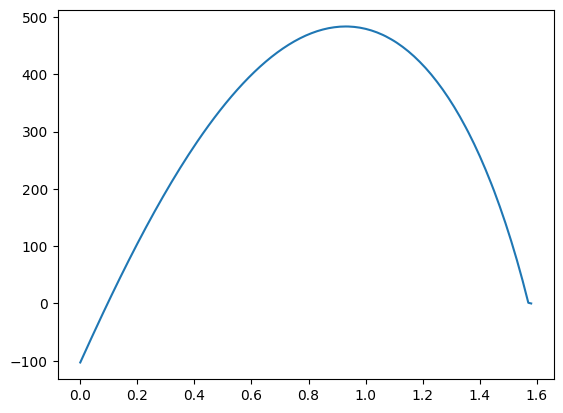

In [21]:
target = 250
wind_velocity = -20
N = 10000
hit = []
angleswind = []

for i in np.arange(0,np.pi/2 + 0.01,0.01):
    X,Z = windmotion(N,20,100,i,wind_velocity,10,100)
    hit.append(X[-1])
    angleswind.append(i)
    

plt.plot(angleswind,hit)

for angle,x in zip(angleswind,hit):
        if x > 250:
                print("angle first past 250:",angle * 180/np.pi,"degrees","distance:",x,"m")
                break


    